In [21]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [22]:
#data clean and preprocess
data_1=pd.read_csv("C:\\Users\\Lenovo\\Downloads\\Alcohol_Sales.csv")
data_2=pd.read_csv("C:\\Users\\Lenovo\\Downloads\\Miles_Traveled.csv")

In [23]:
print(data_1.head(5))
print(data_2.head(5))

         DATE  S4248SM144NCEN
0  1992-01-01            3459
1  1992-02-01            3458
2  1992-03-01            4002
3  1992-04-01            4564
4  1992-05-01            4221
         DATE  TRFVOLUSM227NFWA
0  1970-01-01           80173.0
1  1970-02-01           77442.0
2  1970-03-01           90223.0
3  1970-04-01           89956.0
4  1970-05-01           97972.0


In [24]:
data_1['DATE']=pd.to_datetime(data_1['DATE'])
data_2['DATE']=pd.to_datetime(data_2['DATE'])

In [25]:
print(data_1.head(5))
print(data_2.head(5))

        DATE  S4248SM144NCEN
0 1992-01-01            3459
1 1992-02-01            3458
2 1992-03-01            4002
3 1992-04-01            4564
4 1992-05-01            4221
        DATE  TRFVOLUSM227NFWA
0 1970-01-01           80173.0
1 1970-02-01           77442.0
2 1970-03-01           90223.0
3 1970-04-01           89956.0
4 1970-05-01           97972.0


In [26]:
data_1.rename(columns={'S4248SM144NCEN':'Alcohol_sales'},inplace=True)
data_2.rename(columns={'TRFVOLUSM227NFWA':'Miles_traveled'},inplace=True)

In [27]:
print(data_1.head(5))
print(data_2.head(5))

        DATE  Alcohol_sales
0 1992-01-01           3459
1 1992-02-01           3458
2 1992-03-01           4002
3 1992-04-01           4564
4 1992-05-01           4221
        DATE  Miles_traveled
0 1970-01-01         80173.0
1 1970-02-01         77442.0
2 1970-03-01         90223.0
3 1970-04-01         89956.0
4 1970-05-01         97972.0


In [28]:
data=pd.merge(data_1,data_2,on='DATE',how='inner')
data.set_index('DATE',inplace=True)

In [29]:
data.head()

,Alcohol_sales,Miles_traveled
DATE,,
1992-01-01,3459,167652.0
1992-02-01,3458,160204.0
1992-03-01,4002,183778.0
1992-04-01,4564,186069.0
1992-05-01,4221,196725.0


In [30]:
data.describe()

,Alcohol_sales,Miles_traveled
count,324.000000,324.000000
mean,7877.660494,236098.157407
std,2914.508218,27512.792598
min,3031.000000,160204.000000
25%,5228.000000,216966.750000
50%,7438.500000,240321.000000
75%,9969.500000,258081.750000
max,15504.000000,288145.000000


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 324 entries, 1992-01-01 to 2018-12-01
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Alcohol_sales   324 non-null    int64  
 1   Miles_traveled  324 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.6 KB


In [32]:
data.isnull().sum()

Alcohol_sales     0
Miles_traveled    0
dtype: int64

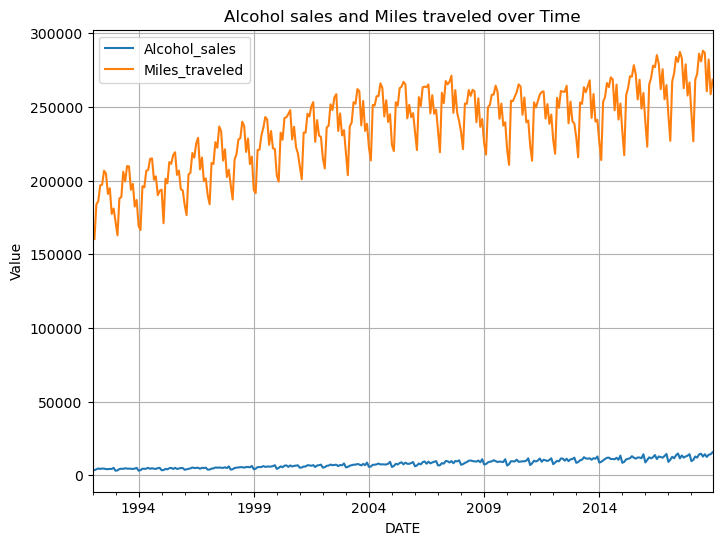

In [33]:
data.plot(figsize=(8,6),title='Alcohol sales and Miles traveled over Time')
plt.xlabel('DATE')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
correlation=data.corr()
print("Correlation Matrix:\n " , correlation)

Correlation Matrix:
                  Alcohol_sales  Miles_traveled
Alcohol_sales        1.000000        0.830149
Miles_traveled       0.830149        1.000000


In [35]:
from statsmodels.tsa.stattools import adfuller

In [36]:
result=adfuller(data['Alcohol_sales'])
print("ADF Statisctics:",result[0])
print ("p Value:",result[1])
for key,value in result[4].items():
    print(f'Critical Value({key}):{value}')

ADF Statisctics: 1.9836632429476786
p Value: 0.9986513435863891
Critical Value(1%):-3.45169128009473
Critical Value(5%):-2.8709394227049154
Critical Value(10%):-2.5717780602423517


In [37]:
data['Alcohol_sales_diff']=data['Alcohol_sales'].diff()
data.dropna(inplace=True)

In [38]:
print(data.head())

            Alcohol_sales  Miles_traveled  Alcohol_sales_diff
DATE                                                         
1992-02-01           3458        160204.0                -1.0
1992-03-01           4002        183778.0               544.0
1992-04-01           4564        186069.0               562.0
1992-05-01           4221        196725.0              -343.0
1992-06-01           4529        197232.0               308.0


In [39]:
result_diff=adfuller(data['Alcohol_sales_diff'])
print("ADF Statisctics:",result_diff[0])
print ("p Value:",result_diff[1])
for key,value in result_diff[4].items():
    print(f'Critical Value({key}):{value}')

ADF Statisctics: -4.512424684517679
p Value: 0.00018672097172886984
Critical Value(1%):-3.45169128009473
Critical Value(5%):-2.8709394227049154
Critical Value(10%):-2.5717780602423517


In [40]:
ts=data['Alcohol_sales']
train=ts[:-12]
test=ts[-12:]

In [41]:
from statsmodels.tsa.arima.model import ARIMA

In [42]:
model=ARIMA(train,order=(1,1,1))
model_fit=model.fit()
print(model_fit.summary())

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          Alcohol_sales   No. Observations:                  311
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2580.698
Date:                Tue, 22 Apr 2025   AIC                           5167.396
Time:                        12:23:31   BIC                           5178.606
Sample:                    02-01-1992   HQIC                          5171.877
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0808      0.062      1.305      0.192      -0.041       0.202
ma.L1         -0.8714      0.031    -28.261      0.000      -0.932      -0.811
sigma2      9.855e+05   7.47e+04     13.192      0.0

In [43]:
forecast=model_fit.forecast(steps=12)
print(forecast)

2018-01-01    12856.244000
2018-02-01    12742.370202
2018-03-01    12733.165456
2018-04-01    12732.421410
2018-05-01    12732.361266
2018-06-01    12732.356405
2018-07-01    12732.356012
2018-08-01    12732.355980
2018-09-01    12732.355977
2018-10-01    12732.355977
2018-11-01    12732.355977
2018-12-01    12732.355977
Freq: MS, Name: predicted_mean, dtype: float64


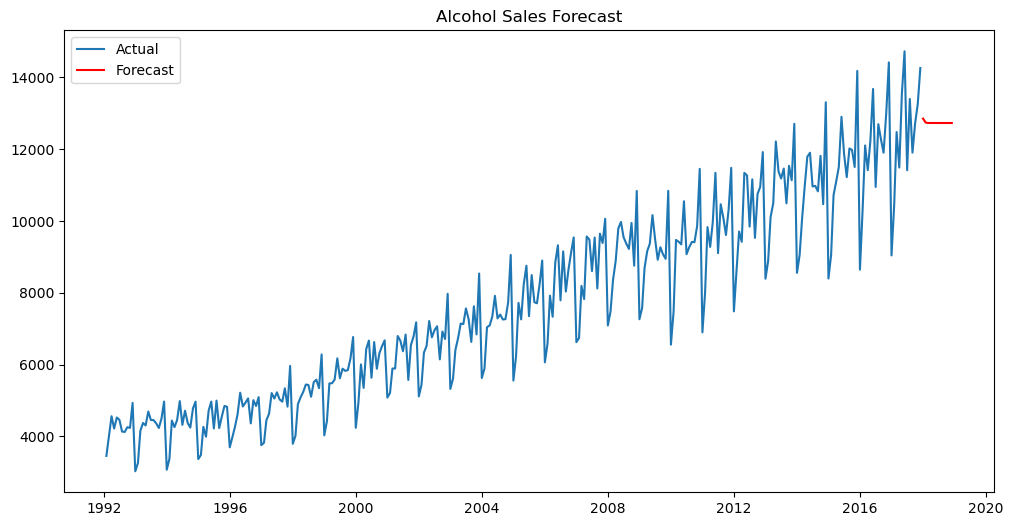

In [44]:
plt.figure(figsize=(12,6))
plt.plot(train,label='Actual')
plt.plot(forecast.index,forecast,label='Forecast',color='red')
plt.legend()
plt.title('Alcohol Sales Forecast')
plt.show()

In [45]:
y_test=test

In [46]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(y_test,forecast)
rmse=np.sqrt(mse) 
mae=mean_absolute_error(y_test,forecast)

In [47]:
print("MSE:",mse)
print("RMSE:",rmse)
print("MAE:",mae)

MSE: 2993602.5485909623
RMSE: 1730.2030368112762
MAE: 1423.980956202681


In [48]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(data['Miles_traveled'])
print("ADF Statistics:",result[0])
print("p-value:",result[1])

ADF Statistics: -2.2464632035423935
p-value: 0.1898159996258939


In [49]:
data_diff = data.diff().dropna()

In [50]:
for column in data_diff.columns:
    result=adfuller(data_diff[column])
    print(f"\nADF Test for {column}")
    print(f"ADF Statistics:{result[0]}")
    print(f"P valuse:{result[1]}")


ADF Test for Alcohol_sales
ADF Statistics:-4.489207805476377
P valuse:0.0002056604249086055

ADF Test for Miles_traveled
ADF Statistics:-4.471784469595262
P valuse:0.00022105888970743926

ADF Test for Alcohol_sales_diff
ADF Statistics:-7.499281576686116
P valuse:4.296215349333848e-11


In [58]:
from statsmodels.tsa.api import VAR
model=VAR(data[['Alcohol_sales','Miles_traveled']])
lag_order_result=model.select_order(maxlags=15)
print(lag_order_result.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        35.10       35.12   1.745e+15       35.10
1        33.09       33.16   2.348e+14       33.12
2        32.71       32.84   1.612e+14       32.76
3        32.40       32.57   1.181e+14       32.47
4        32.18       32.40   9.446e+13       32.27
5        32.05       32.31   8.282e+13       32.15
6        30.96       31.28   2.792e+13       31.09
7        29.46       29.83   6.257e+12       29.61
8        29.41       29.82   5.926e+12       29.57
9        29.20       29.66   4.788e+12       29.38
10       28.98       29.49   3.865e+12       29.19
11       28.66       29.21   2.790e+12       28.88
12       27.80       28.40   1.180e+12       28.04
13       27.67       28.33   1.044e+12       27.93
14       27.64       28.34   1.005e+12       27.92
15      27.47*      28.22*  8.545e+11*      27.77*
-------------------------------

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [62]:
model_fitted=model.fit(15)
print(model_fitted.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 22, Apr, 2025
Time:                     12:33:51
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    28.2233
Nobs:                     308.000    HQIC:                   27.7726
Log likelihood:          -5042.81    FPE:                8.54477e+11
AIC:                      27.4724    Det(Omega_mle):     7.05347e+11
--------------------------------------------------------------------
Results for equation Alcohol_sales
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                   -401.085541       364.445209           -1.101           0.271
L1.Alcohol_sales           0.063824         0.063775            1.001           0.317
L1.Miles_traveled         -0.012

In [70]:
forecast_input = data[['Alcohol_sales', 'Miles_traveled']].values[-15:]  
forecast = model_fitted.forecast(y=forecast_input, steps=10)
forecast_data = pd.DataFrame(forecast, columns=['Alcohol_sales_forecast', 'Miles_traveled_forecast'])
print(forecast_data)


   Alcohol_sales_forecast  Miles_traveled_forecast
0            10476.667142            243705.046241
1            11270.283545            226057.621223
2            13169.116286            271175.584614
3            12764.621495            272785.430435
4            15011.160927            289515.485744
5            14853.855101            281297.836500
6            13566.345434            291210.446974
7            14380.652090            288128.217087
8            13089.962328            262584.785579
9            14541.004715            285147.152226


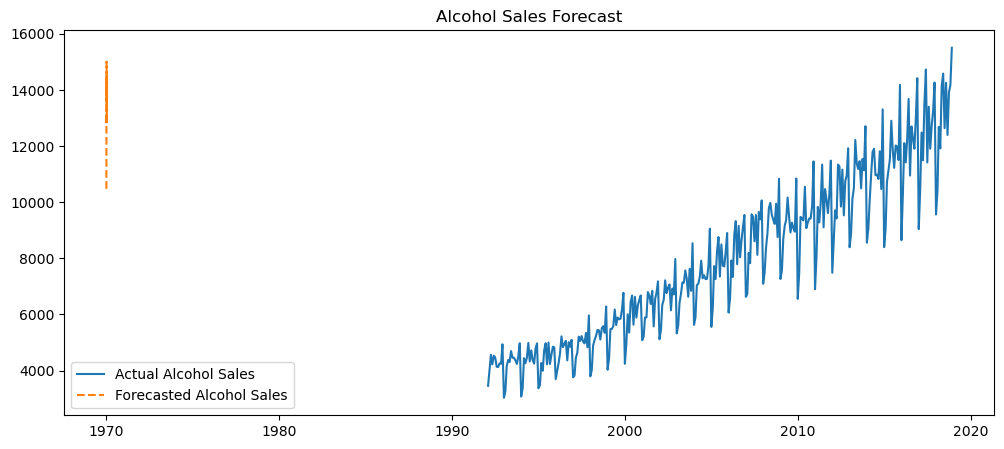

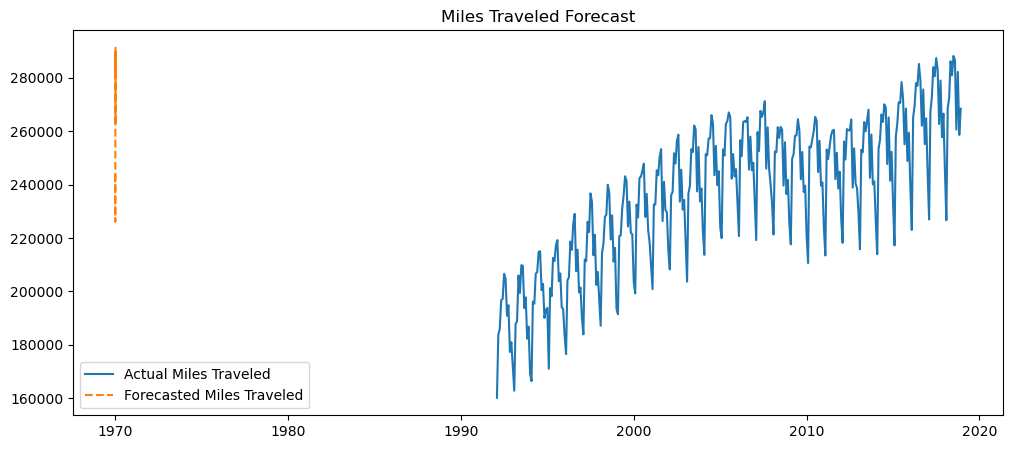

In [76]:
import matplotlib.pyplot as plt

# Plot Alcohol Sales Forecast
plt.figure(figsize=(12, 5))
plt.plot(data['Alcohol_sales'], label='Actual Alcohol Sales')
plt.plot(forecast_data['Alcohol_sales_forecast'], label='Forecasted Alcohol Sales', linestyle='--')
plt.title('Alcohol Sales Forecast')
plt.legend()
plt.show()

# Plot Miles Traveled Forecast
plt.figure(figsize=(12, 5))
plt.plot(data['Miles_traveled'], label='Actual Miles Traveled')
plt.plot(forecast_data['Miles_traveled_forecast'], label='Forecasted Miles Traveled', linestyle='--')
plt.title('Miles Traveled Forecast')
plt.legend()
plt.show()
